## Star Wars Movies Survey Analysis

In [77]:
import pandas as pd
import numpy as np

In [78]:
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import reset_output

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

Reading the csv file and checking first few rows of dataset

In [80]:
data =pd.read_csv("StarWars.csv",encoding = "ISO-8859–1") #pass encoding parmeter to solve encoding problem while opening file

In [81]:
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [82]:
print(data.shape)

(1187, 38)


In [83]:
print(data.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

From above it looks that most of the columns are unnamed

# Cleaning Data

In [85]:
#As we can see in Dataset that respondent value is unique, it shouldn't be NaN

In [86]:
data = data[pd.notnull(data['RespondentID'])]

After removing row without respondent id, moving to next columns:

Next two columns contain values YES, NO of string Type, i have convert these into Bolean True/False to avoid string comparison and make it easier for analysis

In [87]:
data["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [88]:
data["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

cleaning and mapping Yes/No columns

In [89]:
data['Have you seen any of the 6 films in the Star Wars franchise?']=data['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes':True,'No':False}) 

In [90]:
data['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [91]:
data['Do you consider yourself to be a fan of the Star Wars film franchise?']=data['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes':True,'No':False})

In [92]:

data['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Next six columns represent a single checkbox question, and have string values with the movies respondent saw, we need to convert these value into bolean.

In [93]:
# Converting the Movie viewing answers to True/False.

In [94]:
true_false = {
  'Star Wars: Episode I  The Phantom Menace': True,
  'Star Wars: Episode II  Attack of the Clones': True,
  'Star Wars: Episode III  Revenge of the Sith': True,
  'Star Wars: Episode IV  A New Hope': True,
  'Star Wars: Episode V The Empire Strikes Back': True,
  'Star Wars: Episode VI Return of the Jedi': True,
  True: True,
  False: False,
  np.nan: False
}
for col in data.columns[3:9]:
    data[col] = data[col].map(true_false)

In [95]:
#Changing the unnamed and long columns names to more intuitive 

In [96]:
data = data.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "episode_1",
        "Unnamed: 4": "episode_2",
        "Unnamed: 5": "episode_3",
        "Unnamed: 6": "episode_4",
        "Unnamed: 7": "episode_5",
        "Unnamed: 8": "episode_6"
        })

In [97]:
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next six columns ask the respondents to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite and 6 means it was the least favorite.

In [98]:
#converting the ranking columns types and renaming 
data.iloc[:,9:15] = data.iloc[:,9:15].astype(float)

In [99]:
data = data.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Rank_1',
                                        'Unnamed: 10':'Rank_2',
                                         'Unnamed: 11':'Rank_3',
                                         'Unnamed: 12':'Rank_4',
                                         'Unnamed: 13': 'Rank_5',
                                         'Unnamed: 14':'Rank_6'})

In [100]:
data.iloc[:,9:15].head()

,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [101]:
#mean Rankings of each Star Wars movie
data[data.columns[9:15]].mean()

Rank_1    3.732934
Rank_2    4.087321
Rank_3    4.341317
Rank_4    3.272727
Rank_5    2.513158
Rank_6    3.047847
dtype: float64

## Exploratory Analysis & Visualization

In [102]:
output_notebook()

Loading BokehJS ...

## Highest Ranked Movie

In [103]:
ax = data[data.columns[9:15]].mean()
p = figure(plot_height=350, title="Highest Ranked Episode",
           toolbar_location=None, tools="")

p.vbar(x=[1,2,3,4,5,6], top=ax, width=0.8)
p.yaxis.axis_label = 'Rating'
p.xaxis.major_label_overrides = {1: 'Ep 1', 2: 'Ep 2', 3: 'Ep 3', 4:'Ep 4', 5: 'Ep 5', 6: 'Ep 6'}

show(p)


From the above Bar chart we can see that Star Wars Episode 5 has the highest rating (Lower Rating is better as mentioned in Dataset). Higher ranking means less liked. That’s because 1 = ‘Most Liked’ all the way through 6 = ‘Least Liked’.

## Most viewed Movie

In [104]:
mv_seen = data[data.columns[3:9]].sum()

In [105]:
mv_seen

episode_1    673
episode_2    571
episode_3    550
episode_4    607
episode_5    758
episode_6    738
dtype: int64

In [106]:
p = figure(plot_height=350, title="Most viewed Movie",
           toolbar_location=None, tools="")

p.vbar(x=[1,2,3,4,5,6], top=mv_seen, width=0.8)
p.yaxis.axis_label = 'Total Respondent'
p.xaxis.major_label_overrides = {1: 'Ep 1', 2: 'Ep 2', 3: 'Ep 3', 4:'Ep 4', 5: 'Ep 5', 6: 'Ep 6'}

show(p)


More respondants saw the movies(4-5-6)

## Exploring Data by Gender Segmentation

In [107]:
males = data[data["Gender"] == "Male"]
females = data[data["Gender"] == "Female" ]

In [108]:
ranking_by_gender = pd.DataFrame({'males':males[males.columns[9:15]].mean(),
                              'females':females[females.columns[9:15]].mean()})
ranking_by_gender

,males,females
Rank_1,4.037825,3.429293
Rank_2,4.224586,3.954660
Rank_3,4.274882,4.418136
Rank_4,2.997636,3.544081
Rank_5,2.458629,2.569270
Rank_6,3.002364,3.078086


In [109]:
seen_by_gender = pd.DataFrame({'males':males[males.columns[3:9]].sum(),
                              'females':females[females.columns[3:9]].sum()})
seen_by_gender

,males,females
episode_1,361,298
episode_2,323,237
episode_3,317,222
episode_4,342,255
episode_5,392,353
episode_6,387,338


[Text(0,0,'Episode I '),
 Text(0,0,'Episode II'),
 Text(0,0,'Episode III '),
 Text(0,0,'Episode IV '),
 Text(0,0,'Episode V '),
 Text(0,0,'Episode VI')]

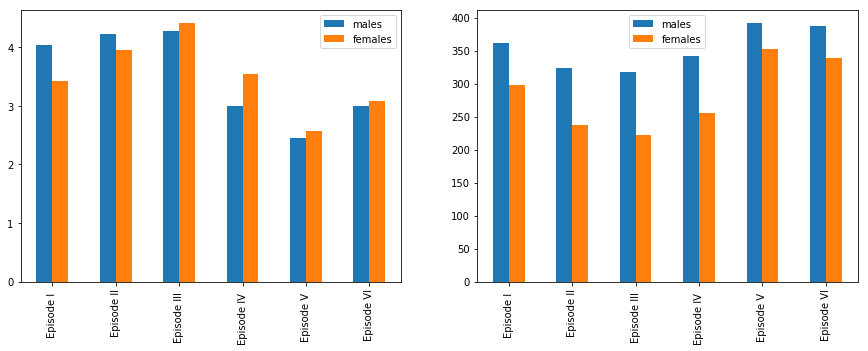

In [110]:
fig = plt.figure(figsize=(15, 5))
x1 = fig.add_subplot(1, 2, 1)
x2 = fig.add_subplot(1, 2, 2)
x1 = ranking_by_gender.plot(kind = 'bar' ,ax=x1)
x1.set_xticklabels(['Episode I ','Episode II','Episode III ','Episode IV ','Episode V ',
                'Episode VI'])
x2 = seen_by_gender.plot(kind = 'bar',ax=x2)
x2.set_xticklabels(['Episode I ','Episode II','Episode III ','Episode IV ','Episode V ',
                'Episode VI'])

More number of males have watched the movies, and in case of reviews given by females are more as compared to male
Most of the females who have watched the movie have given the review aswell

In [111]:
'''
Segmentation of data on Education and  Location.
'''
sr = data.groupby("Education").sum()
sr[sr.columns[3:8]]

,episode_2,episode_3,episode_4,episode_5,episode_6
Education,,,,,
Bachelor degree,170.0,163.0,195.0,243.0,234.0
Graduate degree,149.0,139.0,163.0,207.0,201.0
High school degree,48.0,48.0,53.0,61.0,60.0
Less than high school degree,3.0,3.0,3.0,3.0,3.0
Some college or Associate degree,186.0,183.0,180.0,227.0,223.0


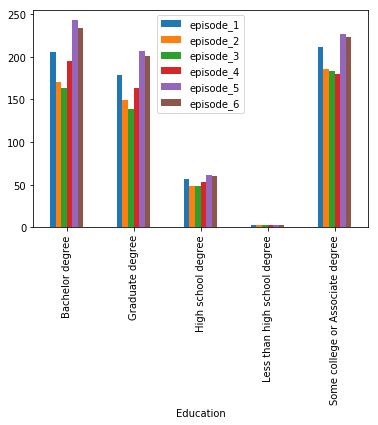

In [112]:
sr[sr.columns[2:8]].plot(kind='bar')

People watching star wars movies have educational background related to Bachelor Degree,Graduate degree,Some college or Associate degree.

In [113]:
location = data.groupby("Location (Census Region)").sum()
location[location.columns[3:8]]

,episode_2,episode_3,episode_4,episode_5,episode_6
Location (Census Region),,,,,
East North Central,89.0,89.0,95.0,128.0,121.0
East South Central,21.0,21.0,27.0,31.0,29.0
Middle Atlantic,69.0,70.0,76.0,83.0,85.0
Mountain,47.0,46.0,54.0,61.0,59.0
New England,44.0,43.0,48.0,55.0,54.0
Pacific,99.0,92.0,105.0,123.0,124.0
South Atlantic,82.0,79.0,93.0,125.0,120.0
West North Central,51.0,49.0,49.0,67.0,63.0
West South Central,58.0,50.0,49.0,70.0,69.0


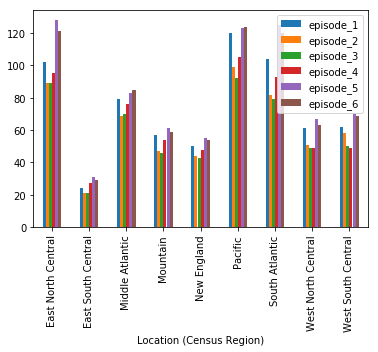

In [114]:
location[location.columns[2:8]].plot(kind = 'bar')

Highest star wars movie watchers belong are from East North Central, Pacific, South Atlantic. The least star movie watchers are from East South Central.

## Segmentation of Respondents by Fans, Non fans and unknown

In [115]:
fan = data[data['Do you consider yourself to be a fan of the Star Wars film franchise?']==1]
not_fan = data[data['Do you consider yourself to be a fan of the Star Wars film franchise?']==0]

In [116]:
num_fans = len(fan)
num_fans

552

In [117]:
num_not_fans = len(not_fan)
num_not_fans

284

In [118]:
total_respondents = len(data)
unknown_respondent = total_respondents - (num_fans + num_not_fans)
unknown_respondent

350

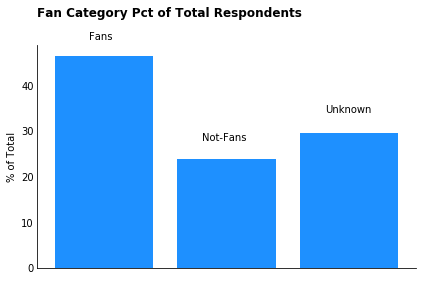

In [119]:
# What pcnt do fans, non-fans, and unknown make out of all respondents?
val = [num_fans/total_respondents*100, num_not_fans/total_respondents*100, (total_respondents - (num_fans+num_not_fans))/total_respondents*100]

fig, ax = plt.subplots()
ax.bar(range(1,4), val, align='center', color='dodgerblue', linewidth=0)
ax.set_ylabel('% of Total')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(length=0)
ax.xaxis.set_ticklabels('')
ax.set_title('Fan Category Pct of Total Respondents', loc='left', fontweight='bold', y=1.1)
ax.text(0.88, 50, 'Fans')
ax.text(1.80, 28, 'Not-Fans')
ax.text(2.80, 34, 'Unknown')
plt.tight_layout()

 About 30% of the respondents who did not specify whether they were fans or not

In [120]:
seen_by_fan = fan.columns[3:9]
sf = fan.sum()[seen_by_fan]

p = figure(plot_height=350, title="Seen by Fans",
           toolbar_location=None, tools="")

p.vbar(x=[1,2,3,4,5,6], top=sf, width=0.8)
p.yaxis.axis_label = 'No of seen'
p.xaxis.major_label_overrides = {1: 'Ep 1', 2: 'Ep 2', 3: 'Ep 3', 4:'Ep 4', 5: 'Ep 5', 6: 'Ep 6'}

show(p)


In [121]:
seen_by_non_fan = not_fan.columns[3:9]
nf = not_fan.sum()[seen_by_non_fan]

In [122]:
p = figure(plot_height=350, title="Seen by Non Fans",
           toolbar_location=None, tools="")

p.vbar(x=[1,2,3,4,5,6], top=nf, width=0.8)
p.yaxis.axis_label = 'No of seen'
p.xaxis.major_label_overrides = {1: 'Ep 1', 2: 'Ep 2', 3: 'Ep 3', 4:'Ep 4', 5: 'Ep 5', 6: 'Ep 6'}

show(p)


The respondents who consider themselves as fans of Star Wars saw each episode, whereas non fans of star wars didn't watch all the episode.